<a href="https://colab.research.google.com/github/suesu1204/DAbook1/blob/main/%EC%99%80%EC%9D%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [14]:
wine = pd.read_csv('/content/wine-clustering.csv')
print(wine.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

- Alcohol : 알코올도수
- Malic acid : 말산, 와인의 신맛에 기여
- Ash : 회분, 와인을 증발시킨 후 남는 무기질 성분
- Alcalinity of ash : 회분의 알칼리도
- Magnesium : 마그네슘,
- Total phenols : 총 페놀
- Flavanoids : 플라보노이드
- Nonflavanoid phenols : 비플라보노이드 페놀
- Proanthocyanins : 프로안토시아닌, 와인의 떫은 맛에 기여
- Color intensity : 색 강도, 와인의 진하기를 나타냄
- Hue : 색조
- OD280/OD315 of diluted wines : 와인의 페놀 화합물의 농도를 특정하는 방법으로, 와인의 품질을 평가하는데 사용
- Proline : 프롤린, 아미노산 중 하나

In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [16]:
#"Magnesium", "Proline" 칼럼 float 로 바꾸기
wine['Magnesium'] = wine['Magnesium'].astype(float)
wine['Proline'] = wine['Proline'].astype(float)

- 데이터 스케일링

Proline, Magnesium 이 너무 큰 범위를 가지므로 표준화(Standardization) 수행

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(wine)

- 군집 평가 : 실루엣 분석

In [21]:
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [27]:
#군집별 평균 실루엣 계수의 시각화를 통한 군집 계수 최적화
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

- K-평균 군집화

In [61]:
from sklearn.cluster import KMeans

wine_km = scaled_data
wine_km_DF = pd.DataFrame(data=wine_km)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

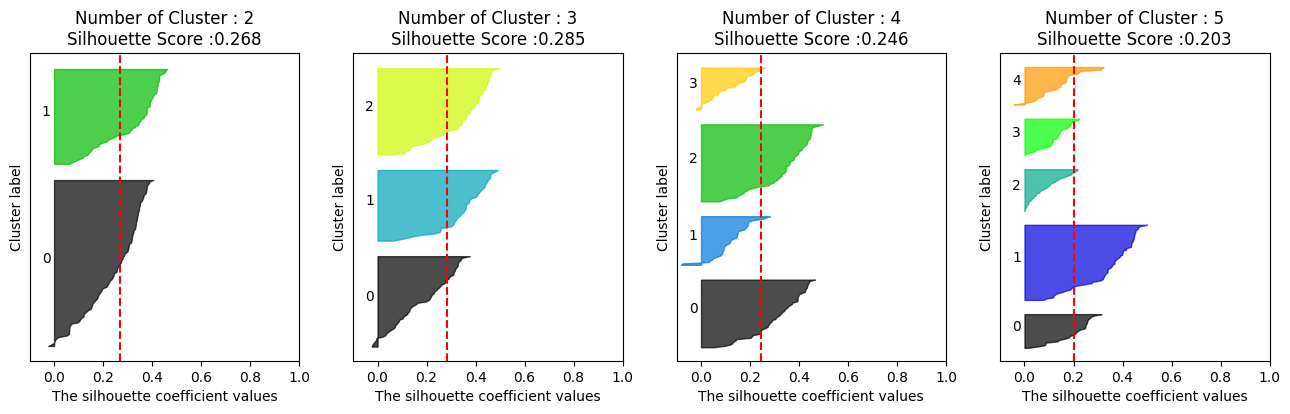

In [62]:
#최적 군집 수 구하기
visualize_silhouette([2,3,4,5], wine_km_DF)

3개인 경우가 가장 적절하다.

In [63]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=178, random_state=0)
kmeans.fit(wine_km_DF)
print(kmeans.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [67]:
wine_km_DF['cluster'] = kmeans.labels_
wine_km_numeric = wine_km_DF.drop(columns=['cluster'])

In [72]:
#시각화

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(wine_km_numeric)

wine_km_DF['pca_x'] = pca_transformed[:, 0]
wine_km_DF['pca_y'] = pca_transformed[:, 1]
wine_km_DF.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,pca_x,pca_y,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,4.690594,-2.041364,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,3.124655,0.471489,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,3.559208,-1.458268,2


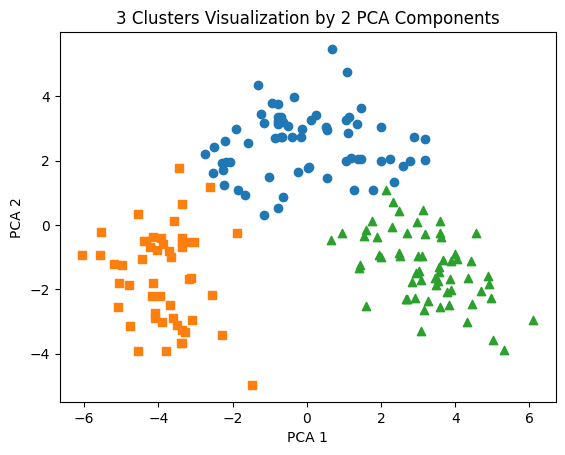

In [73]:
marker0_ind = wine_km_DF[wine_km_DF['cluster']==0].index
marker1_ind = wine_km_DF[wine_km_DF['cluster']==1].index
marker2_ind = wine_km_DF[wine_km_DF['cluster']==2].index

plt.scatter(x=wine_km_DF.loc[marker0_ind, 'pca_x'], y=wine_km_DF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=wine_km_DF.loc[marker1_ind, 'pca_x'], y=wine_km_DF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=wine_km_DF.loc[marker2_ind, 'pca_x'], y=wine_km_DF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()


In [74]:
#실루엣 평가
from sklearn.metrics import silhouette_samples, silhouette_score

wine_km_DF['cluster'] = kmeans.labels_

score_samples = silhouette_samples(wine_km, wine_km_DF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

#실루엣 계수 칼럼
wine_km_DF['silhouette_coeff'] =  score_samples

#모든 데이터의 평균  실루엣 계수  값 구하기
average_score = silhouette_score(wine_km_DF, wine_km_DF['cluster'])
print('와인 데이터 세트 Silhouette Analysis Score: {0: .3f}'.format(average_score))
wine_km_DF.head(3)


silhouette_samples() return 값의 shape (178,)
와인 데이터 세트 Silhouette Analysis Score:  0.417


,0,1,2,3,4,5,6,7,8,9,10,11,12,pca_x,pca_y,cluster,silhouette_coeff
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,4.690594,-2.041364,2,0.448395
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,3.124655,0.471489,2,0.250138
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,3.559208,-1.458268,2,0.376445


In [75]:
#군집별 평균 실루엣 계수 값 구하기
wine_km_DF.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.177409
1,0.350622
2,0.343413


- 평균 이동 (Mean Shift) 군집화

In [97]:
from sklearn.cluster import MeanShift

wine_ms = scaled_data
wine_ms_DF = pd.DataFrame(data=wine_ms)


In [98]:
#최적화된 bandwidth() 값 찾기

from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(wine_ms_DF)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 4.093


In [104]:
meanshift = MeanShift(bandwidth=4.093)
cluster_labels = meanshift.fit_predict(scaled_data)
wine_ms_DF['cluster'] = cluster_labels

In [106]:
n_clusters = len(set(cluster_labels))
print(n_clusters)

2


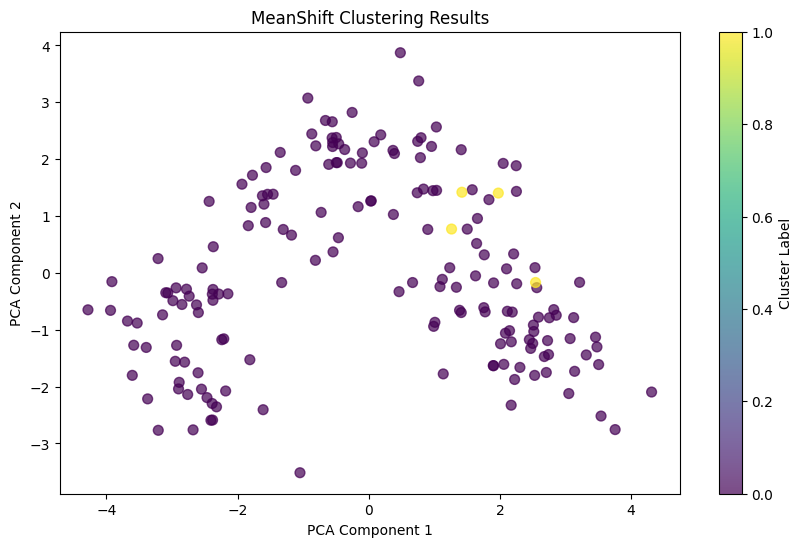

In [107]:
#시각화
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(wine_ms)

wine_ms_DF['pca_x'] = pca_transformed[:, 0]
wine_ms_DF['pca_y'] = pca_transformed[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(wine_ms_DF['pca_x'], wine_ms_DF['pca_y'], c=wine_ms_DF['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('MeanShift Clustering Results')
plt.show()

- GMM 군집화

In [108]:
from sklearn.mixture import GaussianMixture

wine_gm = scaled_data
wine_gm_DF = pd.DataFrame(data=wine_gm)


In [112]:
gmm = GaussianMixture(n_components=3, random_state=0).fit(wine_gm)
gmm_cluster_labels = gmm.predict(wine_gm)

wine_gm_DF['cluster'] = gmm_cluster_labels

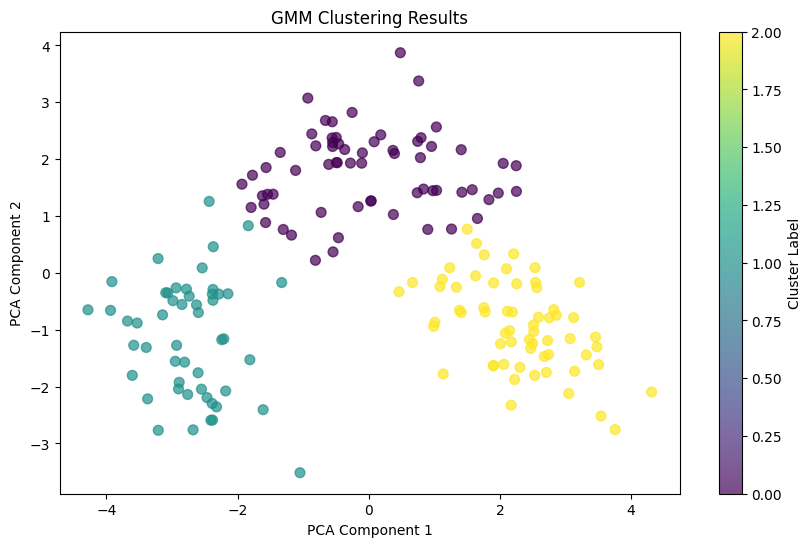

In [113]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(wine_gm)

wine_gm_DF['pca_x'] = pca_transformed[:, 0]
wine_gm_DF['pca_y'] = pca_transformed[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(wine_gm_DF['pca_x'], wine_gm_DF['pca_y'], c=wine_gm_DF['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('GMM Clustering Results')
plt.show()

- DBSCAN 군집화

In [114]:
from sklearn.cluster import DBSCAN

wine_db = scaled_data
wine_db_DF = pd.DataFrame(data=wine_db)

In [132]:
eps = 3.0
min_samples = 2
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(wine_db)

In [133]:
wine_db_DF['cluster'] = cluster_labels

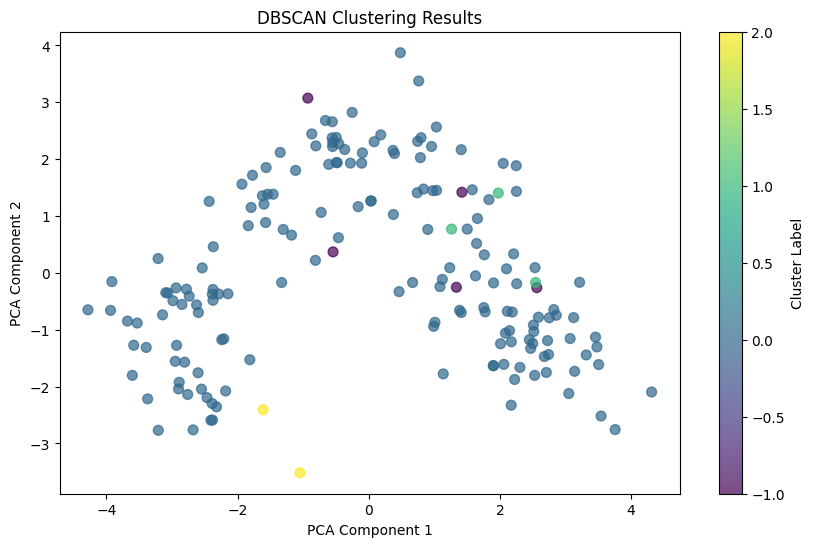

In [134]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(wine_db)

wine_db_DF['pca_x'] = pca_transformed[:, 0]
wine_db_DF['pca_y'] = pca_transformed[:, 1]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(wine_db_DF['pca_x'], wine_db_DF['pca_y'], c=wine_db_DF['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Results')
plt.show()

In [136]:
#정규화로 해보기?
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
normalized_data = scaler_minmax.fit_transform(wine)

wine_db = normalized_data
wine_db_DF = pd.DataFrame(data=wine_db)

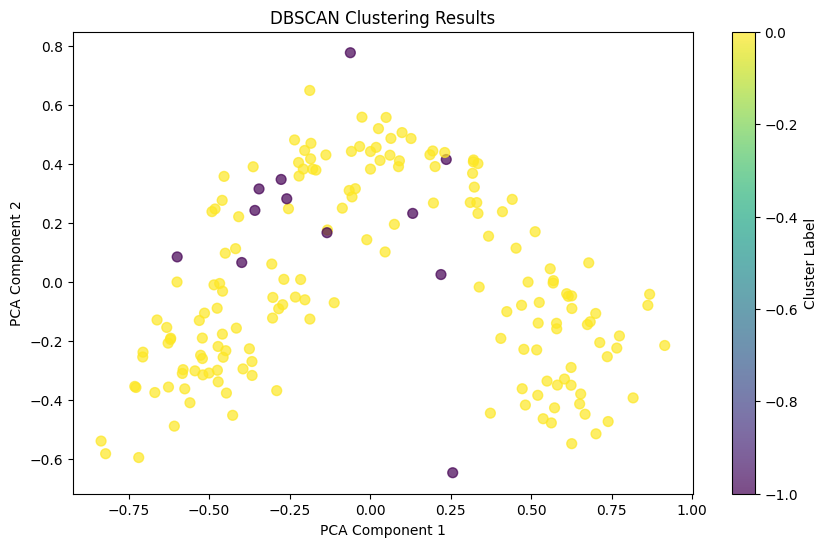

In [138]:
eps = 0.6
min_samples = 8
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(wine_db)

wine_db_DF['cluster'] = cluster_labels

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(wine_db)

wine_db_DF['pca_x'] = pca_transformed[:, 0]
wine_db_DF['pca_y'] = pca_transformed[:, 1]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(wine_db_DF['pca_x'], wine_db_DF['pca_y'], c=wine_db_DF['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Results')
plt.show()